Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

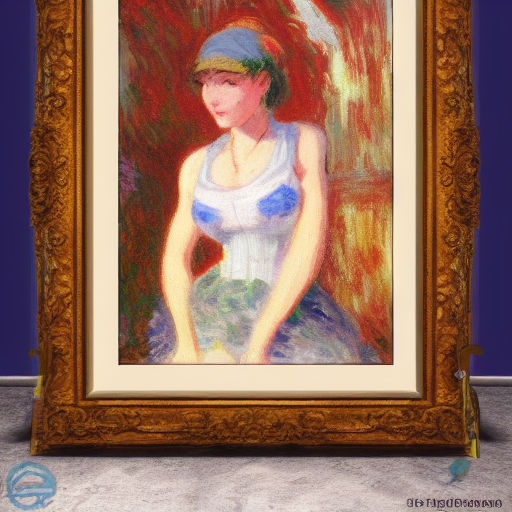

In [29]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:1"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "female 3d game character bnha, Skill magic geek inside matrix deepdream radiating a glowing aura stuff loot legends stylized digital illustration video game icon artstation lois van baarle, ilya kuvshinov, rossdraws"
prompt = "portrait of female 3d game character bnha, impressionist style from the 19th century, claude monet, oil painting"

torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=4.5).images[0]

from lora_diffusion import monkeypatch_replace_lora, monkeypatch_lora, tune_lora_scale

monkeypatch_lora(pipe.unet, torch.load("../output_example_text_1e-4/lora_weight.pt"))
monkeypatch_lora(pipe.text_encoder, torch.load("../output_example_text_1e-4/lora_weight.text_encoder.pt"))

tune_lora_scale(pipe.unet, alpha=0.0)
tune_lora_scale(pipe.text_encoder, alpha=0.0)
image  # nice, but that's the base model.

  0%|          | 0/50 [00:00<?, ?it/s]

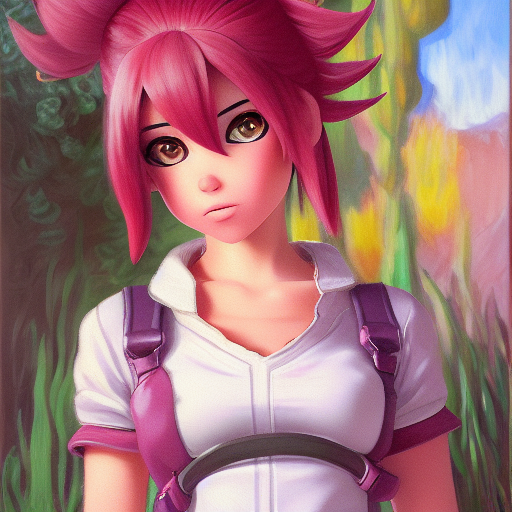

In [30]:
from lora_diffusion import monkeypatch_replace_lora, monkeypatch_lora, tune_lora_scale

tune_lora_scale(pipe.unet, 0.8)
tune_lora_scale(pipe.text_encoder, 0.8)
torch.manual_seed(0)
pipe(prompt, num_inference_steps=50, guidance_scale=4.5).images[0]


In [31]:
import glob
import os
from lora_diffusion import monkeypatch_replace_lora, monkeypatch_lora, tune_lora_scale

def process_lr(lr :str = "1e-4"):
    alls = set(glob.glob(f"../output_example_text_{lr}/lora_weight_*.pt"))
    texts = set(glob.glob(f"../output_example_text_{lr}/lora_weight_*.text_encoder.pt"))
    unets = alls - texts

    unets = list(unets)
    unets.sort(key=os.path.getmtime)
    texts = list(texts)
    texts.sort(key=os.path.getmtime)

    imgs = []

    for unet_lora, text_lora in zip(unets, texts):
        monkeypatch_replace_lora(pipe.unet, torch.load(unet_lora))
        monkeypatch_replace_lora(pipe.text_encoder, torch.load(text_lora), target_replace_module=["CLIPAttention"])
        
        tune_lora_scale(pipe.unet, 0.8)
        tune_lora_scale(pipe.text_encoder, 0.8)
        
        torch.manual_seed(0)
        image = pipe(prompt, num_inference_steps=50, guidance_scale=4.5).images[0]
        imgs.append(image)
        
    
    return imgs

imgsets = {}
for lr in ["2.5e-5", "5e-5", "1e-4", "2e-4", "4e-4"]:
    imgsets[lr] = process_lr(lr)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [32]:
from PIL import Image

def image_grid(_imgs, rows, cols):
    assert len(_imgs) == rows*cols

    w, h = _imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(_imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

img_for_grid = []
len_imgsets = len(imgsets)
len_col = len(imgsets["1e-4"])

for lr in ["2.5e-5", "5e-5", "1e-4", "2e-4", "4e-4"]:
    for i in range(len_col):
        img_for_grid.append(imgsets[lr][i])


image_grid(img_for_grid[:len_col * len_imgsets], len_imgsets, len_col).save("../contents/lora_diff_lrs_0.6.jpg")